# Seaborn을 이용한 주요 시각화 그래프

- Seaborn 공식 사이트 : https://seaborn.pydata.org/tutorial.html
- Matplotlib 기반으로 쉽게 작성됨. Matplotlib의 high level API
- Matplotlib 보다 수려한 디자인을 제공하며 Pandas와 쉽게 연동
- 그러나 Matplotlib을 어느 정도 알고 있어야함

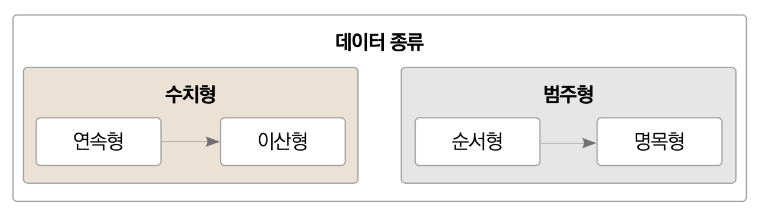

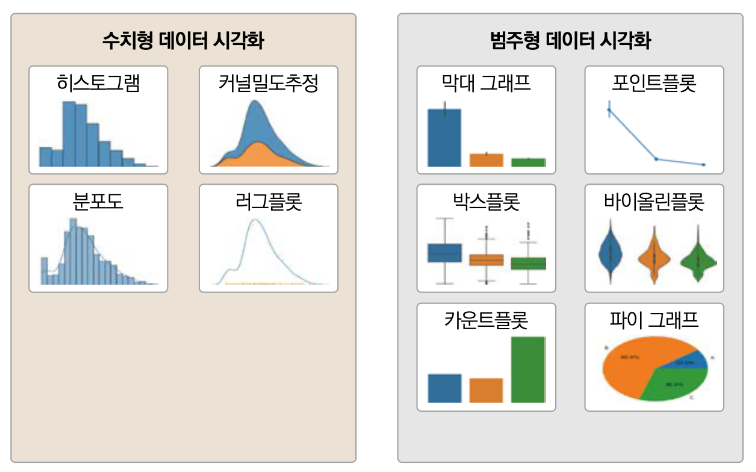

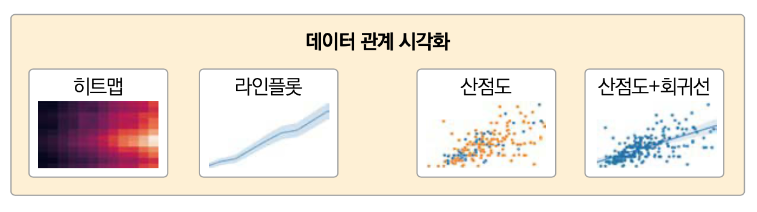

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 수치형 데이터 시각화

### 1. 히스토그램
- 수치형 데이터의 구간별 빈도수를 나타내는 그래프

- matplotlib 지원

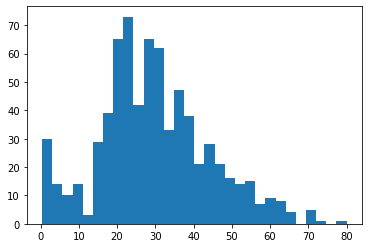

In [4]:
plt.hist(titanic_df['Age'], bins = 30)
plt.show()

- pandas에서 직접 호출 가능

<AxesSubplot:>

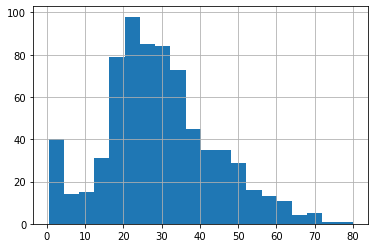

In [5]:
titanic_df['Age'].hist(bins = 20)

- seabron 지원

<AxesSubplot:xlabel='Age', ylabel='Count'>

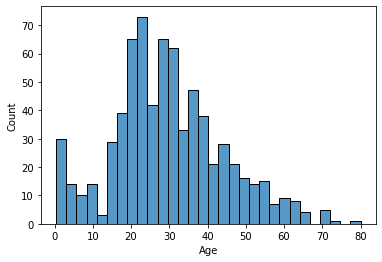

In [6]:
sns.histplot(titanic_df, x="Age", bins = 30)

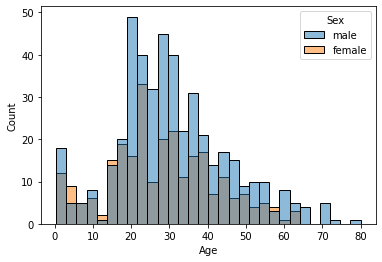

In [15]:
# 겹쳐서 보여줌
sns.histplot(titanic_df, x="Age", bins = 30, hue = "Sex")
plt.show()

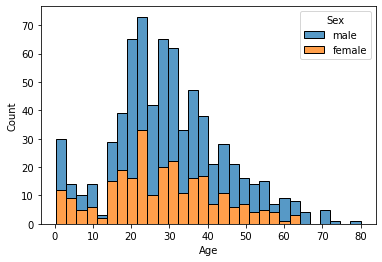

In [17]:
# multiple="stack"을 사용해서 쌓아서 보여주기
# y축 = 각 연령대별 남녀 합을 기준으로 축의 범위가 더 커진 것을 확인할 수 있음

sns.histplot(titanic_df, x="Age", bins = 30, hue = "Sex", multiple="stack")
plt.show()

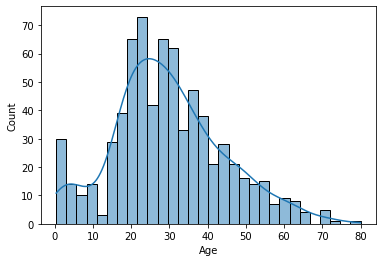

In [18]:
sns.histplot(titanic_df, x="Age", bins = 30, kde = True)
plt.show()

### 2. 커널밀도추정 함수 (KDE)

- 히스토그램을 매끄럽게 곡선으로 연결한 그래프
- 유한한 데이터 샘플을 기반으로 전체 모집단에 대한 추론을 하는 방식입니다. 독립적이고 동일하게 분산된 미지의 분포로부터 원래 함수를 추정하는 것

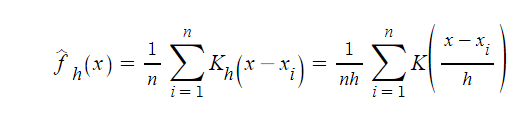

<AxesSubplot:xlabel='Age', ylabel='Density'>

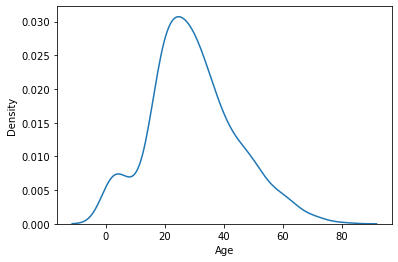

In [19]:
sns.kdeplot(data=titanic_df, x="Age")

<AxesSubplot:xlabel='Age', ylabel='Density'>

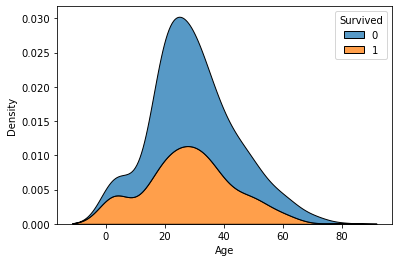

In [20]:
sns.kdeplot(data=titanic_df, x="Age", hue="Survived", multiple="stack")

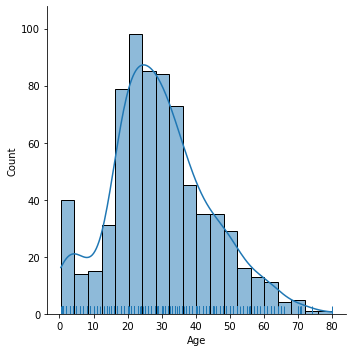

In [21]:
# Figure level API
sns.displot(data=titanic_df, x="Age", kde=True, rug=True)

## 범주형 데이터 시각화

### 1. 막대그래프(barplot)
- 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려줌
- 수치형 데이터 평균은 막대높이로, 신뢰구간은 오차 막대로 표현함

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

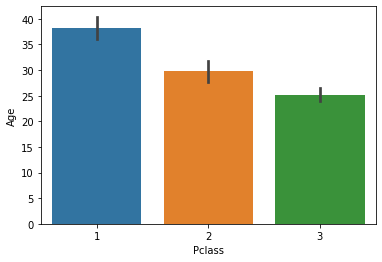

In [22]:
sns.barplot(data=titanic_df, x="Pclass", y="Age")
#sns.barplot(data=titanic_df, x="Pclass", y="Fare")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

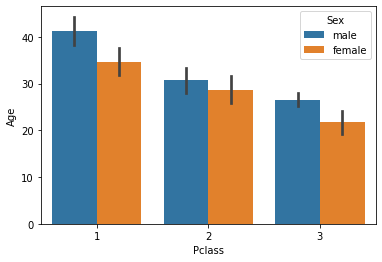

In [23]:
sns.barplot(data=titanic_df, x="Pclass", y="Age", hue="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

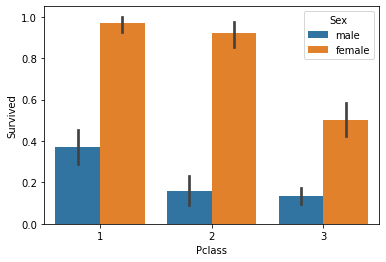

In [24]:
sns.barplot(data=titanic_df, x="Pclass", y="Survived", hue="Sex")

In [9]:
bins = [0, 18, 25, 35, 60, 80]
group_names = ['Children', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
titanic_df["Age_cat"] = pd.cut(titanic_df['Age'], bins, labels=group_names)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

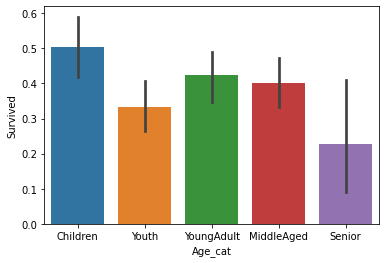

In [10]:
sns.barplot(data=titanic_df, x="Age_cat", y="Survived")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

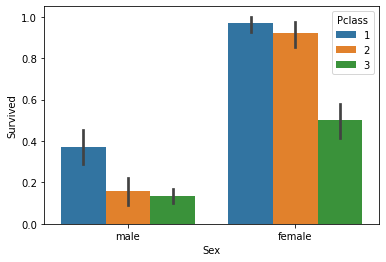

In [11]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Pclass")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

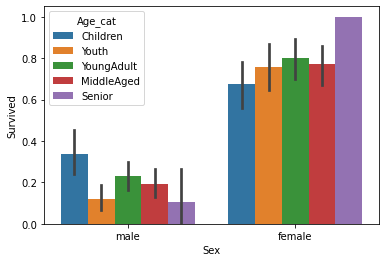

In [12]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Age_cat")

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

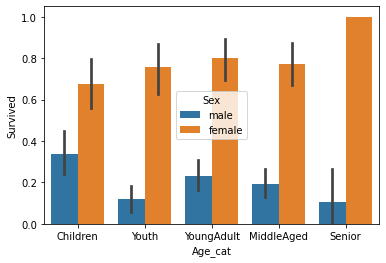

In [14]:
sns.barplot(data=titanic_df, x="Age_cat", y="Survived", hue="Sex")

### 2. 포인트 플롯(pointplot)
- 막대 그래프와 모양만 다를 뿐 동일한 정보 제공
- 막대 그래프와 마찬가지로 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 나타냄
- 다만 그래프를 점과 선으로 나타냄

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

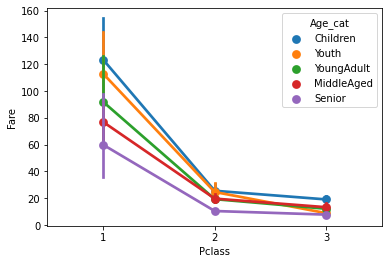

In [28]:
sns.pointplot(data=titanic_df, x="Pclass", y="Fare", hue="Age_cat")

### 3. 박스플롯(boxplot)
- 막대그래프나 포인트플롯보다 더 많은 정보를 제공
- 5가지 요약 수치 : 최솟값, 1사분위수(Q1), 2사분위수(Q2), 3사분위수(Q3), 최댓값

- 1사분위수(Q1) : 전체 데이터 중 하위 25%에 해당하는 값
- 2사분위수(Q2): 50%에 해당하는 값 
- 3사분위수(Q3) : 상위 25%에 해당하는 값
- 사분위 범위수(IQR) : Q3 - Q1
- 최댓값(Max) : Q3 + (1.5 * IQR)
- 최솟값(Min) : Q1 - (1.5 * IQR)

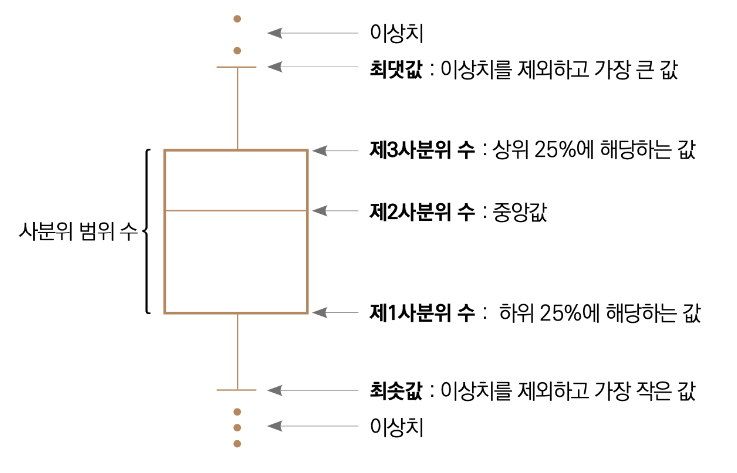

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

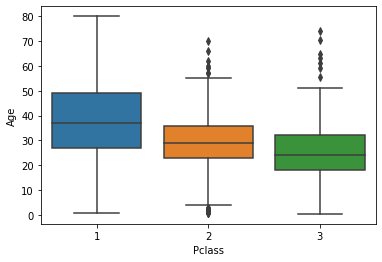

In [29]:
sns.boxplot(data=titanic_df, x="Pclass", y="Age")

### 4. 바이올린플롯(violinplot)
- 박스플롯과 커널밀도추정 함수 그래프를 합쳐 놓은 그래프
- 박스플롯에 제공하는 정보를 모두 포함하며, 모양은 커널밀도추정 함수 그래프 형태임

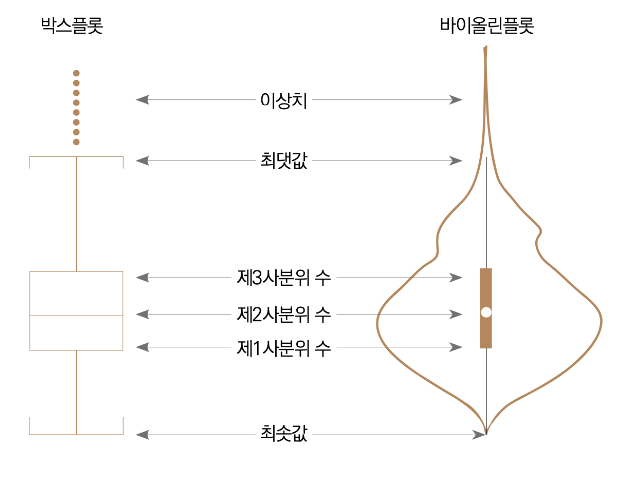

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

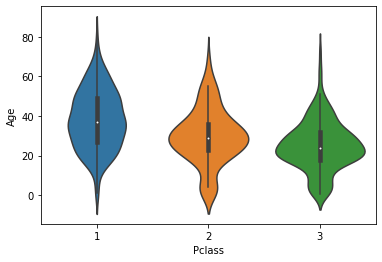

In [30]:
sns.violinplot(data=titanic_df, x="Pclass", y="Age")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

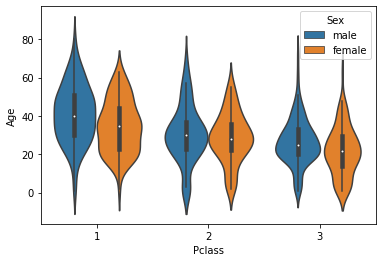

In [31]:
sns.violinplot(data=titanic_df, x="Pclass", y="Age", hue="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

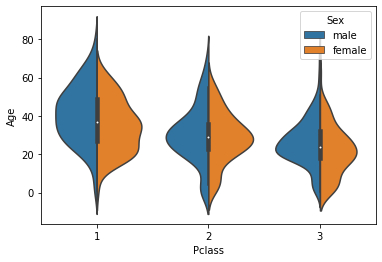

In [32]:
sns.violinplot(data=titanic_df, x="Pclass", y="Age", hue="Sex", split=True)

### 5. 카운트플롯(countplot)
- 카운트플롯은 범주형 데이터의 개수를 확인할 때 사용하는 그래프
- 주로 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악하는 용도로 사용
- 카운트플롯을 사용하면 범주형 데이터의 개수를 파악할 수 있음


<AxesSubplot:xlabel='Pclass', ylabel='count'>

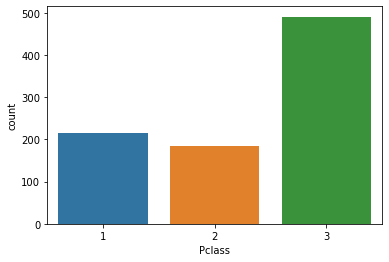

In [33]:
sns.countplot(data=titanic_df, x="Pclass")

<AxesSubplot:xlabel='count', ylabel='Pclass'>

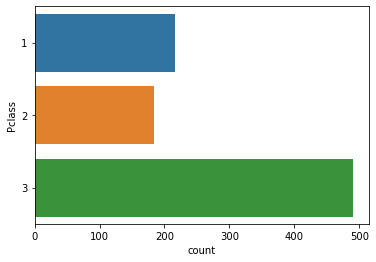

In [34]:
sns.countplot(data=titanic_df, y="Pclass")

### 6. 파이 그래프(pie)
- 범주형 데이터별 비율을 알아볼 때 사용하기 좋은 그래프
- seaborn에서 파이 그래프를 지원하지 않아 matplotlib을 사용

In [15]:
data = titanic_df["Pclass"].value_counts() # data = Series type

<AxesSubplot:ylabel='Pclass'>

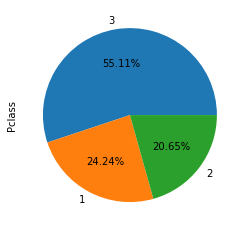

In [16]:
data.plot(kind="pie", autopct="%.2f%%")

## 데이터 관계 시각화

### 1. 히트맵(heatmap)
- 데이터 간 관계를 색상으로 표현한 그래프
- 비교해야 할 데이터가 많을 때 주로 사용

In [17]:
corr = titanic_df.corr()

<AxesSubplot:>

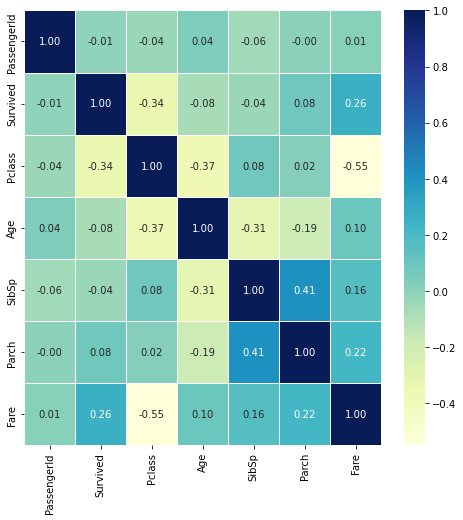

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap="YlGnBu")

* [컬러맵 정보](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)


### 2. 산점도(scatterplot)
- 산점도는 두 데이터의 관계를 점으로 표현하는 그래프

<AxesSubplot:xlabel='Age', ylabel='Fare'>

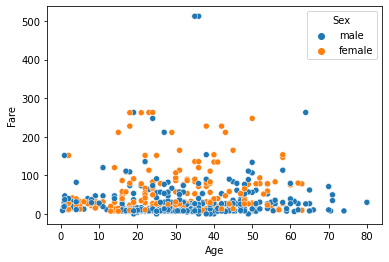

In [19]:
sns.scatterplot(data=titanic_df, x="Age", y="Fare", hue="Sex")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

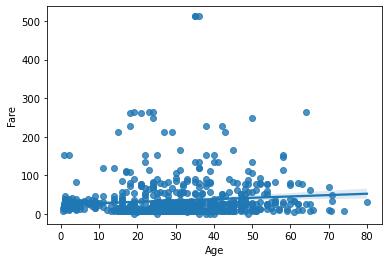

In [20]:
sns.regplot(data=titanic_df, x="Age", y="Fare")

## seaborn에서 subplots 이용하기 

In [21]:
cat_columns = ["Survived", "Pclass", "Sex", "Embarked", "Age_cat"]

In [22]:
for index, column in enumerate(cat_columns):
    print(index, column)
    

0 Survived
1 Pclass
2 Sex
3 Embarked
4 Age_cat


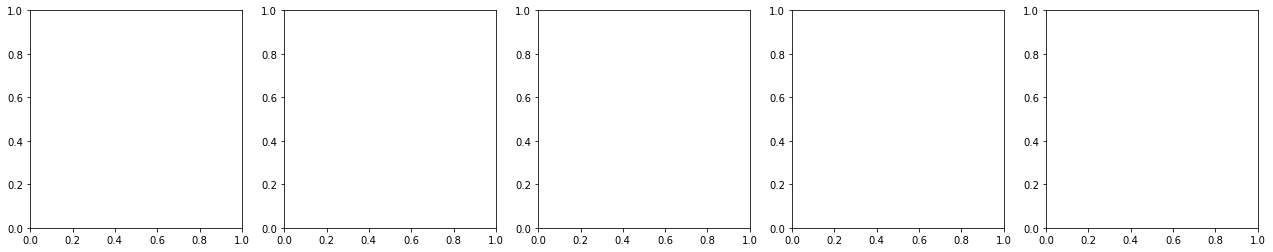

In [23]:
figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(22, 4))

#### (1) subplots을 이용하여 주요 category성 컬럼의 건수를 시각화 하기

In [24]:
titanic_df["Age_cat"].value_counts().index

CategoricalIndex(['YoungAdult', 'MiddleAged', 'Youth', 'Children', 'Senior'], categories=['Children', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior'], ordered=True, dtype='category')

[Text(0, 0, 'Children'), Text(1, 0, 'Youth'), Text(2, 0, 'YoungAdult'), Text(3, 0, 'MiddleAged'), Text(4, 0, 'Senior')]


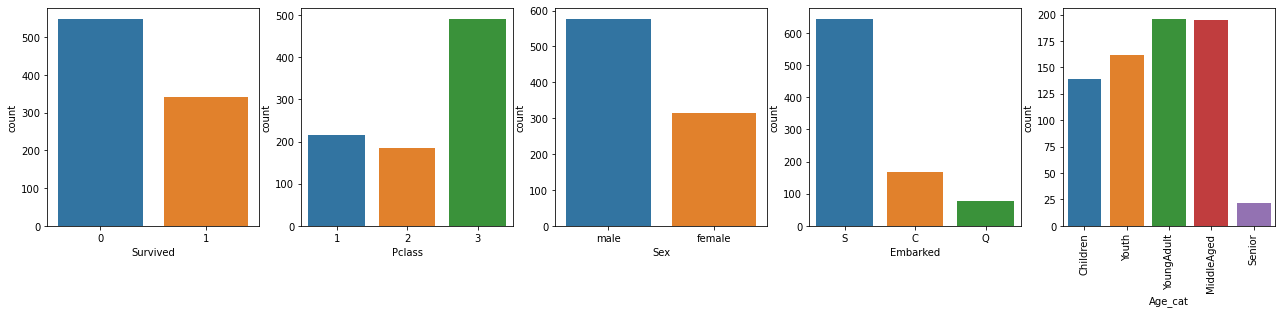

In [25]:
cat_columns = ["Survived", "Pclass", "Sex", "Embarked", "Age_cat"]

figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(22, 4))

for index, column in enumerate(cat_columns):
    sns.countplot(data=titanic_df, x=column, ax=axes[index] )
    if (index == 4):
        print(axes[4].get_xticklabels())
        axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)


#### (2) subplots을 이용하여 주요 category성 컬럼별로 컬럼값에 따른 생존율 시각화 하기

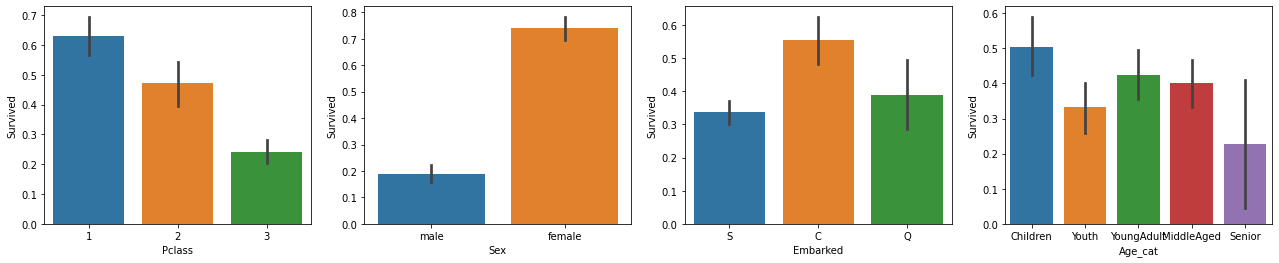

In [26]:
cat_columns = ["Pclass", "Sex", "Embarked", "Age_cat"]

figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(22, 4))

for index, column in enumerate(cat_columns):
    sns.barplot(data=titanic_df, x=column, y="Survived", ax=axes[index])
